## Análisis de datos - Clase 3
---

## Taller práctico parte 1 - análisis inicial de un dataset
---


Vamos a realizar una actividad con un dataset con datos del Servicio Meteorológico Nacional Argentino. El dataset contiene estadísticas climáticas normales (período 1991-2020).

Fuente: https://www.smn.gob.ar/descarga-de-datos

Consigna: identificar los valores faltantes y posibles causas.

Resumen de variables:
* estación, provincia, latitud, longitud, altitud, número y NroOACI (estos dos últimos identifican las estaciones)
* mes
* temperatura media, máxima y mínima
* humedad relativa
* velocidad del viento
* nubosidad total (en meteorología, la nubosidad se mide en octas (0, despejado - 8 completamente cubierto), que representan la fracción del cielo cubierta por nubes)
* precipitación
* frecuencia de días con precipitación superior a 0,1 mm.

In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
smn_historico = pd.read_csv('smn_historico.csv', na_values=['S/D'])

In [10]:
smn_historico.describe()

,altura,numero,LAT_decimal,LON_decimal,prec_sup_1mm,humedad,nubosidad,prec_mm,temp,temp_max,temp_min,viento
count,1152.000000,1152.000000,1152.000000,1152.000000,1061.000000,1110.000000,1166.000000,1061.000000,1167.000000,1158.000000,1124.000000,708.000000
mean,328.812500,87570.031250,-36.347049,-62.623785,5.097455,68.005405,3.840137,68.234873,14.834190,21.223834,9.102847,13.011582
std,468.195292,450.772923,10.369416,5.591299,2.536586,11.027475,0.888284,51.674519,8.178787,8.938676,7.778743,5.554040
min,5.000000,87007.000000,-77.866667,-72.050000,0.000000,25.700000,1.300000,0.000000,-20.900000,-17.500000,-25.000000,3.900000
25%,45.250000,87284.250000,-38.437500,-66.458333,3.100000,61.325000,3.300000,23.300000,10.300000,17.025000,4.500000,9.200000
50%,141.000000,87520.500000,-34.500000,-63.183333,5.200000,70.100000,3.700000,58.900000,15.700000,22.400000,9.900000,11.800000
75%,450.000000,87697.750000,-29.891667,-58.775000,7.000000,76.400000,4.200000,106.500000,21.200000,27.900000,15.100000,15.900000
max,3459.000000,89066.000000,-22.100000,-34.616667,13.800000,90.200000,7.500000,277.900000,28.300000,35.500000,22.500000,36.500000


In [11]:
smn_historico.head(20)

,estacion,provincia,altura,numero,NroOACI,LAT_decimal,LON_decimal,mes_txt,prec_sup_1mm,humedad,nubosidad,prec_mm,temp,temp_max,temp_min,viento
0,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Ene,6.7,67.0,3.1,117.5,24.5,28.4,20.8,16.8
1,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Feb,6.0,69.8,3.2,112.3,23.7,27.3,20.2,15.8
2,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Mar,5.9,71.3,3.1,111.8,22.0,25.5,18.8,14.9
3,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Abr,6.6,73.6,3.5,108.3,18.5,22.0,15.3,13.9
4,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,May,5.0,76.4,4.0,83.3,15.2,18.4,12.3,12.9
5,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Jun,4.5,76.3,4.2,54.6,12.3,15.5,9.4,12.2
6,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Jul,5.0,75.5,4.1,64.3,11.3,14.4,8.4,13.2
7,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Ago,5.0,73.6,3.9,61.5,12.9,16.5,9.7,14.0
8,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Sep,5.5,71.1,3.8,72.6,14.7,18.3,11.5,16.6
9,AEROPARQUE AERO,CAPITAL FEDERAL,6.0,87582.0,SABE,-34.550000,-58.416667,Oct,7.5,70.6,3.9,104.7,17.7,21.1,14.3,17.2


In [9]:
smn_historico.tail()

,estacion,provincia,altura,numero,NroOACI,LAT_decimal,LON_decimal,mes_txt,prec_sup_1mm,humedad,nubosidad,prec_mm,temp,temp_max,temp_min,viento
1171,VILLA REYNOLDS AERO,SAN LUIS,486.0,87448.0,SAOR,-33.716667,-65.366667,Ago,2.4,63.3,3.4,15.6,9.7,20.2,1.5,11.2
1172,VILLA REYNOLDS AERO,SAN LUIS,486.0,87448.0,SAOR,-33.716667,-65.366667,Sep,4.0,60.9,3.6,35.4,13.1,22.6,4.6,12.6
1173,VILLA REYNOLDS AERO,SAN LUIS,486.0,87448.0,SAOR,-33.716667,-65.366667,Oct,7.1,63.0,3.9,65.8,16.9,25.2,8.9,16.3
1174,VILLA REYNOLDS AERO,SAN LUIS,486.0,87448.0,SAOR,-33.716667,-65.366667,Nov,8.8,62.0,3.8,92.4,20.0,28.1,11.9,15.1
1175,VILLA REYNOLDS AERO,SAN LUIS,486.0,87448.0,SAOR,-33.716667,-65.366667,Dic,9.1,62.1,3.6,105.4,22.5,30.6,14.3,14.0


<Axes: >

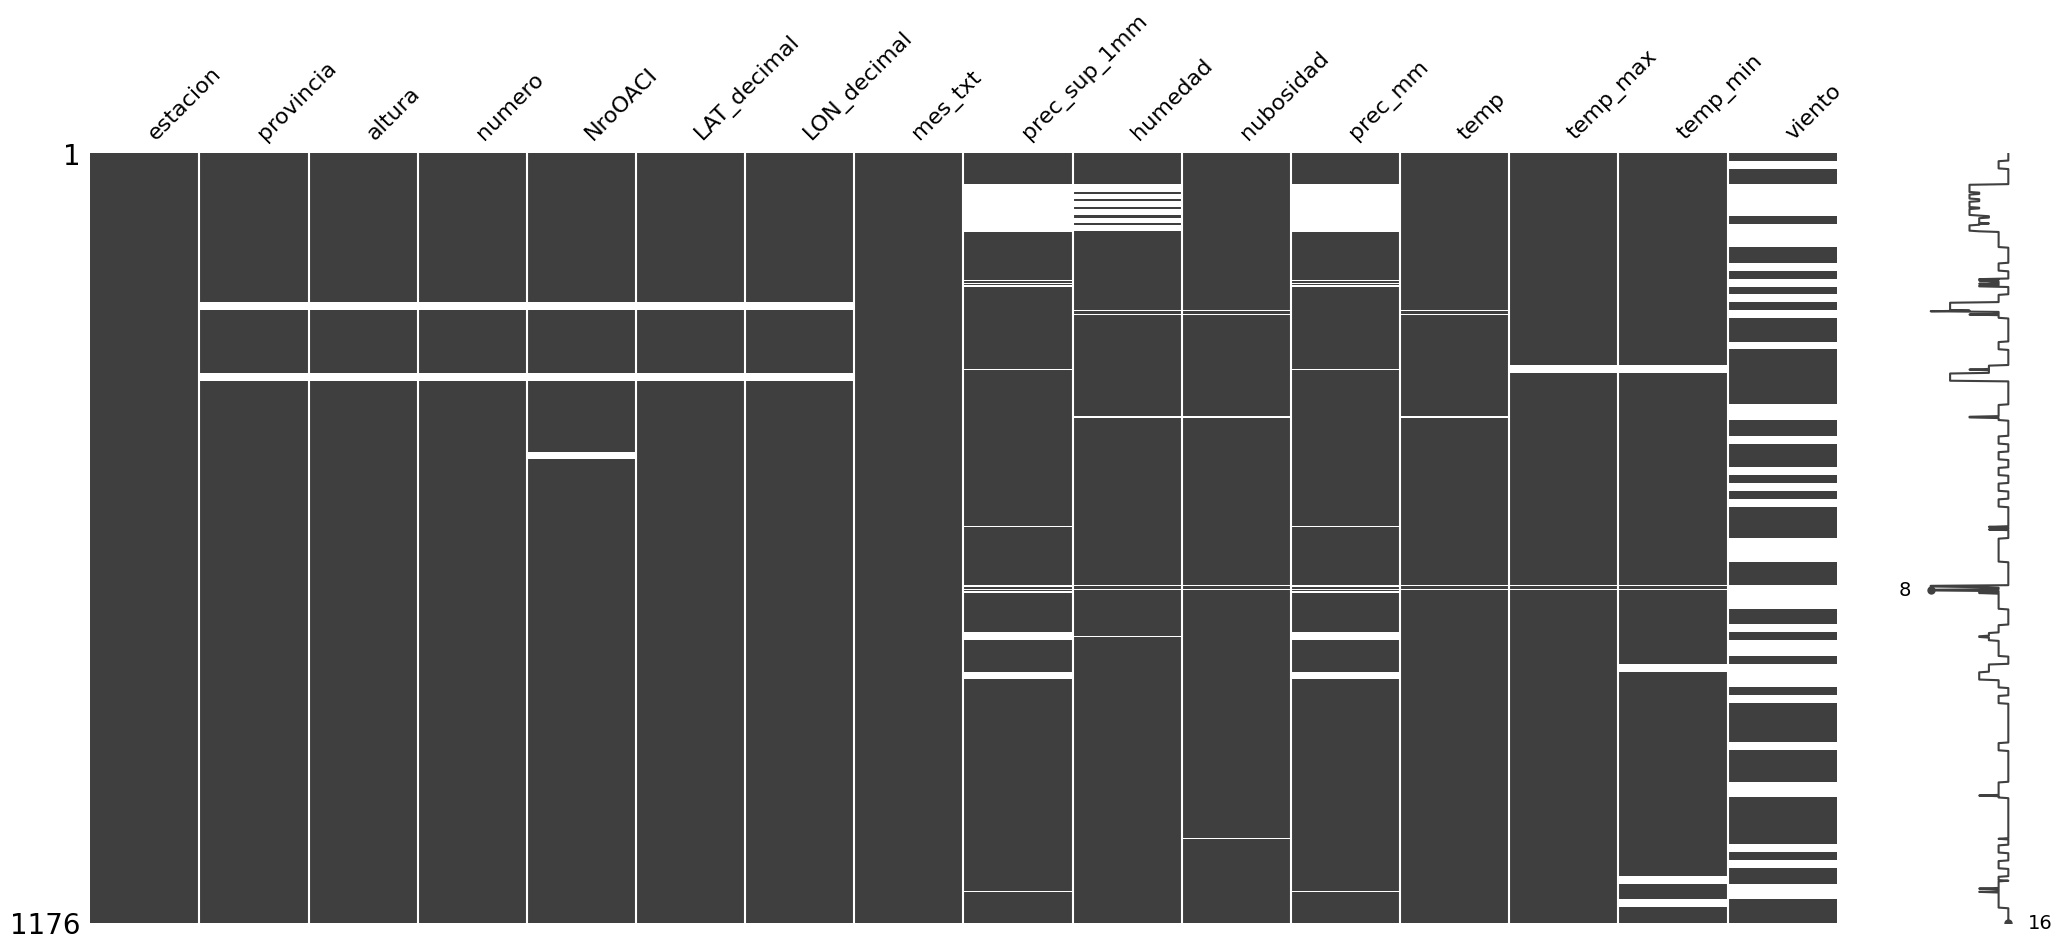

In [7]:
import missingno as msno
msno.matrix(smn_historico)

In [39]:
smn_historico[smn_historico["prec_mm"].isna()].head(10)

,estacion,provincia,altura,numero,NroOACI,LAT_decimal,LON_decimal,mes_txt,prec_sup_1mm,humedad,nubosidad,prec_mm,temp,temp_max,temp_min,viento
48,BASE BELGRANO II,ANTARTIDA,256.0,89034.0,SAYB,-77.866667,-34.616667,Ene,NaN,NaN,5.4,NaN,-2.6,0.7,-6.1,NaN
49,BASE BELGRANO II,ANTARTIDA,256.0,89034.0,SAYB,-77.866667,-34.616667,Feb,NaN,NaN,5.0,NaN,-7.1,-3.5,-11.1,NaN
50,BASE BELGRANO II,ANTARTIDA,256.0,89034.0,SAYB,-77.866667,-34.616667,Mar,NaN,NaN,4.8,NaN,-12.3,-9.1,-16.5,NaN
51,BASE BELGRANO II,ANTARTIDA,256.0,89034.0,SAYB,-77.866667,-34.616667,Abr,NaN,NaN,4.4,NaN,-16.4,-13.2,-20.5,NaN
52,BASE BELGRANO II,ANTARTIDA,256.0,89034.0,SAYB,-77.866667,-34.616667,May,NaN,NaN,4.0,NaN,-17.5,-14.1,-21.6,NaN
53,BASE BELGRANO II,ANTARTIDA,256.0,89034.0,SAYB,-77.866667,-34.616667,Jun,NaN,NaN,3.9,NaN,-18.9,-15.7,-23.0,NaN
54,BASE BELGRANO II,ANTARTIDA,256.0,89034.0,SAYB,-77.866667,-34.616667,Jul,NaN,NaN,4.1,NaN,-20.9,-17.5,-25.0,NaN
55,BASE BELGRANO II,ANTARTIDA,256.0,89034.0,SAYB,-77.866667,-34.616667,Ago,NaN,NaN,4.3,NaN,-20.7,-17.1,-24.9,NaN
56,BASE BELGRANO II,ANTARTIDA,256.0,89034.0,SAYB,-77.866667,-34.616667,Sep,NaN,NaN,4.7,NaN,-18.4,-14.9,-22.8,NaN
57,BASE BELGRANO II,ANTARTIDA,256.0,89034.0,SAYB,-77.866667,-34.616667,Oct,NaN,NaN,4.8,NaN,-14.1,-10.2,-18.8,NaN


In [41]:
smn_historico[smn_historico["temp_max"].isna()]

,estacion,provincia,altura,numero,NroOACI,LAT_decimal,LON_decimal,mes_txt,prec_sup_1mm,humedad,nubosidad,prec_mm,temp,temp_max,temp_min,viento
241,CORONEL SUAREZ AERO,BUENOS AIRES,233.0,87637.0,SAZC,-37.450000,-61.883333,Feb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,EL PALOMAR AERO,BUENOS AIRES,12.0,87571.0,SADP,-34.600000,-58.600000,Ene,6.6,66.7,3.2,115.9,24.1,NaN,NaN,12.0
325,EL PALOMAR AERO,BUENOS AIRES,12.0,87571.0,SADP,-34.600000,-58.600000,Feb,6.0,71.4,3.3,112.0,23.1,NaN,NaN,11.1
326,EL PALOMAR AERO,BUENOS AIRES,12.0,87571.0,SADP,-34.600000,-58.600000,Mar,6.0,74.7,3.2,104.3,21.0,NaN,NaN,10.2
327,EL PALOMAR AERO,BUENOS AIRES,12.0,87571.0,SADP,-34.600000,-58.600000,Abr,6.8,78.9,3.6,112.4,17.0,NaN,NaN,9.4
328,EL PALOMAR AERO,BUENOS AIRES,12.0,87571.0,SADP,-34.600000,-58.600000,May,4.9,82.1,4.0,72.9,13.4,NaN,NaN,8.7
329,EL PALOMAR AERO,BUENOS AIRES,12.0,87571.0,SADP,-34.600000,-58.600000,Jun,4.4,81.1,4.2,54.5,10.5,NaN,NaN,8.9
330,EL PALOMAR AERO,BUENOS AIRES,12.0,87571.0,SADP,-34.600000,-58.600000,Jul,NaN,79.5,4.1,NaN,9.7,NaN,NaN,9.6
331,EL PALOMAR AERO,BUENOS AIRES,12.0,87571.0,SADP,-34.600000,-58.600000,Ago,4.6,75.6,3.9,63.9,11.8,NaN,NaN,10.8
332,EL PALOMAR AERO,BUENOS AIRES,12.0,87571.0,SADP,-34.600000,-58.600000,Sep,5.2,72.5,3.8,66.9,13.9,NaN,NaN,12.9


In [27]:
smn_historico.iloc[228:230]

,estacion,provincia,altura,numero,NroOACI,LAT_decimal,LON_decimal,mes_txt,prec_sup_1mm,humedad,nubosidad,prec_mm,temp,temp_max,temp_min,viento
228,CORONEL PRINGLES AERO,NaN,NaN,NaN,NaN,NaN,NaN,Ene,6.4,61.5,3.3,73.9,21.5,29.3,13.7,10.8
229,CORONEL PRINGLES AERO,NaN,NaN,NaN,NaN,NaN,NaN,Feb,6.4,68.7,3.5,91.5,19.9,27.5,13.0,9.3


In [28]:
smn_historico.iloc[336:338]

,estacion,provincia,altura,numero,NroOACI,LAT_decimal,LON_decimal,mes_txt,prec_sup_1mm,humedad,nubosidad,prec_mm,temp,temp_max,temp_min,viento
336,EL TREBOL,NaN,NaN,NaN,NaN,NaN,NaN,Ene,6.5,70.6,3.3,123.8,23.9,30.7,17.4,9.3
337,EL TREBOL,NaN,NaN,NaN,NaN,NaN,NaN,Feb,6.4,75.6,3.4,115.9,22.5,29.2,16.4,9.0


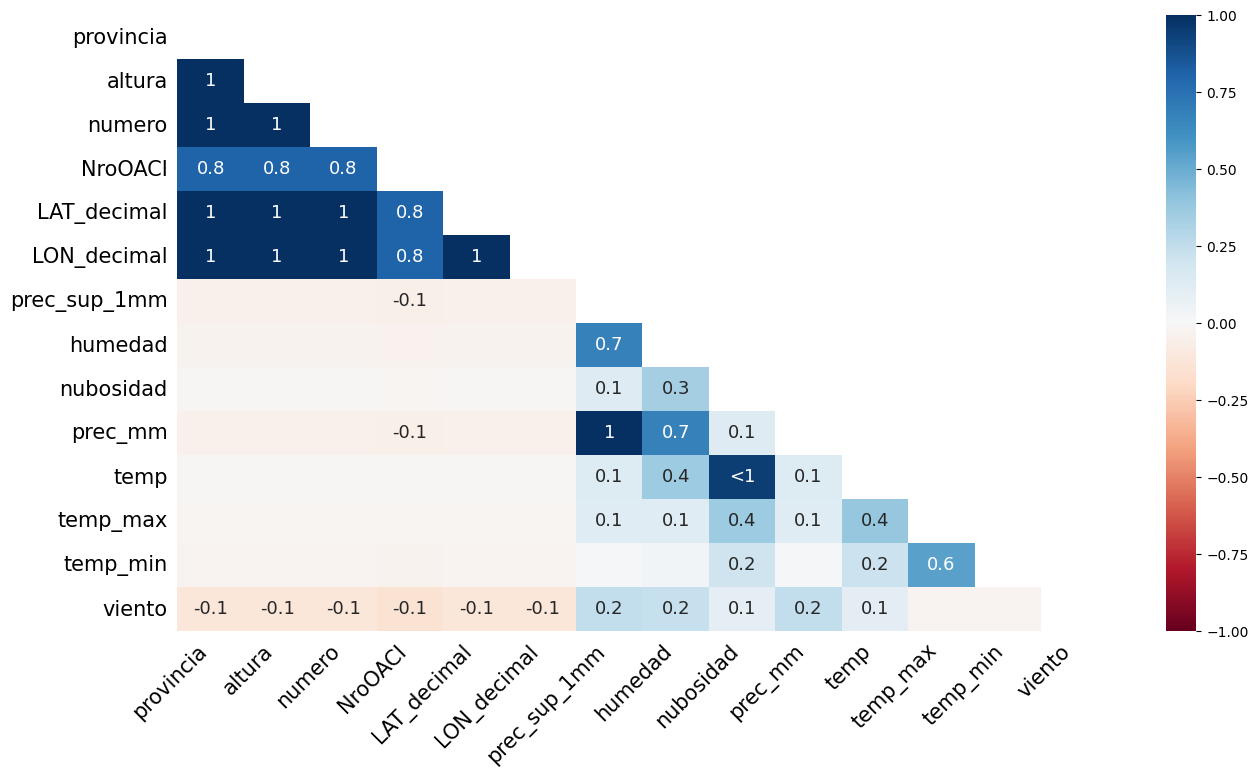

In [37]:
msno.heatmap(smn_historico, fontsize=15, figsize=(15,8))
plt.show()